<a href="https://colab.research.google.com/github/LogeswaranSR/PRODIGY_ML_01/blob/main/Linear_Regression_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c house-prices-advanced-regression-techniques
! unzip /content/house-prices-advanced-regression-techniques.zip

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 105MB/s]
Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
data = pd.read_csv("train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
null_count=data.isnull().sum()
null_count[null_count>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [4]:
null_count[data.dtypes=='int64']

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [5]:
from sklearn.decomposition import PCA
PCA_columns = ['TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageArea','PoolArea','GrLivArea','WoodDeckSF','OpenPorchSF','TotRmsAbvGrd','KitchenAbvGr','BsmtFullBath','BsmtHalfBath']
pca = PCA(n_components=3)
new_cols = pca.fit_transform(data[PCA_columns])
new_cols

array([[  74.63125702, -635.92162824, -140.51843347],
       [-140.33527859,  461.78008001,  -55.59434262],
       [ 197.6491876 , -604.19315254, -142.59127452],
       ...,
       [ 827.13721117, -759.99509838,  -14.1430607 ],
       [-466.29783654,  334.56668975,  -40.78635652],
       [-157.56635562,  451.5426481 ,  -34.9043075 ]])

In [6]:
train_X = pd.DataFrame(columns=['Area','Bedrooms','Bathrooms', 'col1', 'col2', 'col3'])
train_X['Area'] = data['LotArea']
train_X['Bedrooms'] = data['BedroomAbvGr']
train_X['Bathrooms'] = data['FullBath'] + data['HalfBath']
train_X['col1'] = new_cols[:, 0]
train_X['col2'] = new_cols[:, 1]
train_X['col3'] = new_cols[:, 2]
train_X

,Area,Bedrooms,Bathrooms,col1,col2,col3
0,8450,3,3,74.631257,-635.921628,-140.518433
1,9600,3,2,-140.335279,461.780080,-55.594343
2,11250,3,3,197.649188,-604.193153,-142.591275
3,9550,3,1,66.643455,-569.948180,0.905110
4,14260,4,3,791.475438,-633.508645,-165.078341
...,...,...,...,...,...,...
1455,7917,3,3,51.394968,-422.098081,-105.552027
1456,13175,3,2,911.455788,705.208596,420.777466
1457,9042,4,2,827.137211,-759.995098,-14.143061
1458,9717,2,1,-466.297837,334.566690,-40.786357


In [7]:
train_Y = data['SalePrice']
train_Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [8]:
X_tr, X_val, Y_tr, Y_val = train_test_split(train_X, train_Y, test_size=0.2, random_state=123)

In [9]:
print("Shape of Data")
print("X_Train:", X_tr.shape)
print("X_Val:", X_val.shape)
print("Y_Train:", Y_tr.shape)
print("Y_Val:", Y_val.shape)

Shape of Data
X_Train: (1168, 6)
X_Val: (292, 6)
Y_Train: (1168,)
Y_Val: (292,)


In [10]:
model = LinearRegression(fit_intercept=False)
model.fit(X_tr, Y_tr)

LinearRegression(fit_intercept=False)

In [11]:
model.score(X_val, Y_val)

0.5842389060921048

In [12]:
Y_pred = model.predict(X_val)
print(r2_score(Y_pred, Y_val))
# mean_squared_error(Y_pred, Y_val)

0.4592471665123513


In [13]:
line_creation=LinearRegression()
sample_X = np.array(train_X['col1']).reshape(-1,1)
line_creation.fit(sample_X, train_Y)

LinearRegression()

In [14]:
sample_X = np.sort(sample_X)
sample_X[:5]

array([[  74.63125702],
       [-140.33527859],
       [ 197.6491876 ],
       [  66.64345486],
       [ 791.47543841]])

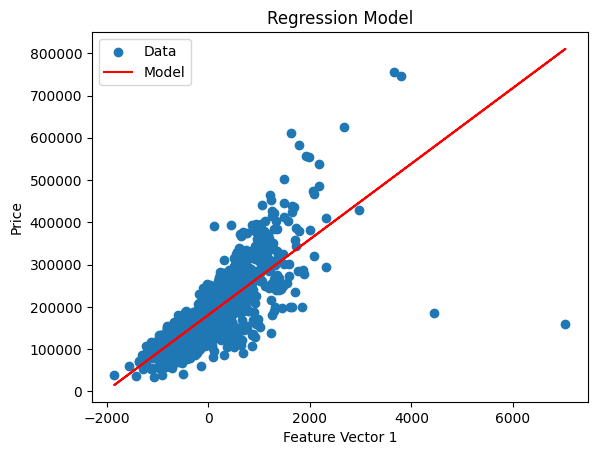

In [15]:
plt.scatter(train_X['col1'], train_Y, label='Data')
plt.plot(sample_X, line_creation.predict(sample_X), color='r', label='Model')
plt.xlabel("Feature Vector 1")
plt.ylabel("Price")
plt.title("Regression Model")
plt.legend()
plt.savefig("Regression_model.jpg")
plt.show()

In [21]:
import pickle
with open("model.pkl",'wb') as model_file:
  pickle.dump([model, pca, {'PCA Columns':PCA_columns, 'n_components':3, 'dataset':'house-prices-advanced-regression-techniques'}], model_file)